In [1]:
%load_ext autoreload
%matplotlib inline

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns  # Seaborn enhances the aesthetics of matplotlib plots
import os 
import pandas as pd
import xarray as xr
import seaborn as sns
import warnings
import logging

import matplotlib as mpl
import warnings
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
# sns.set()

from tempest import casestudy
from tempest import grid
from tempest import storm_tracker
from tempest import joint_distrib
from tempest import handler
from tempest.plots.hist import simple_hist

# funcs

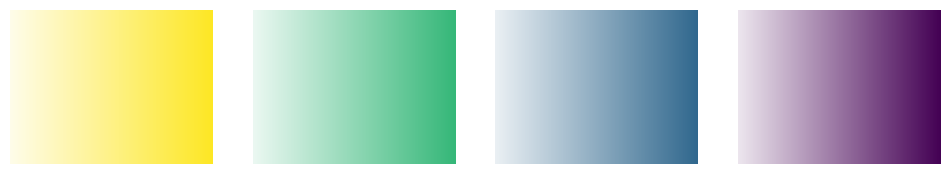

In [2]:
values = np.array([1, 2, 3, 4])
cmap = mpl.cm.viridis
norm = mpl.colors.BoundaryNorm(np.arange(0.5, 5), cmap.N)

# Sample colors from the viridis colormap
colors = cmap(norm(values))

cmaps = []
# Function to create a unicolor colormap with white/blank first, base color, then dark
def create_unicolor_colormap(base_color):
    # Create colors that start from white, transition to the base color, then to dark
    start = np.array([1, 1, 1, 1])  # white color
    end = np.array(base_color) # base color
    light_color = start + (end - start) * 0.1
    new_colors = [light_color * (1 - i) + end * i for i in np.linspace(0, 1, 256)]
    return mpl.colors.LinearSegmentedColormap.from_list("unicolor", new_colors)

for i, color in enumerate(colors[::-1]):
    new_cmap = create_unicolor_colormap(color)
    cmaps.append(new_cmap)

# Example usage: Visualizing the colormaps
fig, axs = plt.subplots(nrows=1, ncols=len(cmaps), figsize=(12, 2))
for ax, cmap in zip(axs, cmaps):
    gradient = np.linspace(0, 1, 256)
    gradient = np.vstack((gradient, gradient))
    ax.imshow(gradient, aspect='auto', cmap=cmap)
    ax.axis('off')
plt.show()

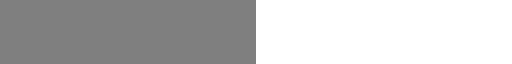

In [ ]:
import matplotlib.colors as mcolors
colors = [(0.5, 0.5, 0.5, 1.0), (1.0, 1.0, 1.0, 1.0)]  # Grey and Transparent
cmap_grey = mcolors.ListedColormap(colors)

# Define a normalization that maps True to 1 and False to 0
norm_grey = mcolors.BoundaryNorm(boundaries=[0, 0.5, 1], ncolors=2)
cmap_grey

In [ ]:
import os
import pickle

def save_data(file_path, data):
    with open(file_path, 'wb') as f:
        pickle.dump(data, f)

def load_data(file_path):
    with open(file_path, 'rb') as f:
        return pickle.load(f)

def check_and_create_directory(directory_path):
    if not os.path.exists(directory_path):
        os.makedirs(directory_path)

## Final Fig 6

In [5]:
### WINTER ###
settings_paths = [
"settings/obs_winter_30d.yaml",
"settings/arpege_winter_30d.yaml", 
"settings/xshield_winter_30d.yaml" , 
"settings/ifs_winter_30d.yaml", 
"settings/screamv1_winter_30d.yaml",
               ]

hdlrs = [handler.Handler(settings_path) for settings_path in settings_paths]
css = [casestudy.CaseStudy(hdlr, overwrite = False ,verbose = False) for hdlr in hdlrs]
grs = [grid.Grid(cs, fast = True, overwrite= False, verbose_steps = False, verbose = False) for cs in css]
jds = [joint_distrib.JointDistribution(gr, None, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_75_Prec", 
        nbpd = 20,  nd=4, overwrite = False, dist_mask = False) for gr in grs]

lm = grs[0].get_landmask()
ocean = lm.Landmask == 0
ocean = ocean.values[:,:,np.newaxis]

Data loaded from /scratchx/mcarenso/tempest/OBS_Winter_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/ARPEGE_Winter_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/XSHiELD_Winter_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/IFS_Winter_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/SCREAMv1_Winter_lowRes_Tropics/var_id_days_i_t.json
Found grid attributes file , so loading /scratchx/mcarenso/tempest/OBS_Winter_lowRes_Tropics/grid_attributes.pkl instead of computing
Found grid attributes file , so loading /scratchx/mcarenso/tempest/ARPEGE_Winter_lowRes_Tropics/grid_attributes.pkl instead of computing
Found grid attributes file , so loading /scratchx/mcarenso/tempest/XSHiELD_Winter_lowRes_Tropics/grid_attributes.pkl instead of computing
Found grid attributes file , so loading /scratchx/mcarenso/tempest/IFS_Winter_lowRes_Tropics/grid_attributes.pkl instead of 

figure size = 15 2.6875
Loading data_layers from /scratchx/mcarenso/tempest/OBS_Winter_lowRes_Tropics/map_data_layers.pkl.
Loading data_layers from /scratchx/mcarenso/tempest/ARPEGE_Winter_lowRes_Tropics/map_data_layers.pkl.
Loading data_layers from /scratchx/mcarenso/tempest/XSHiELD_Winter_lowRes_Tropics/map_data_layers.pkl.
Loading data_layers from /scratchx/mcarenso/tempest/IFS_Winter_lowRes_Tropics/map_data_layers.pkl.
Loading data_layers from /scratchx/mcarenso/tempest/SCREAMv1_Winter_lowRes_Tropics/map_data_layers.pkl.


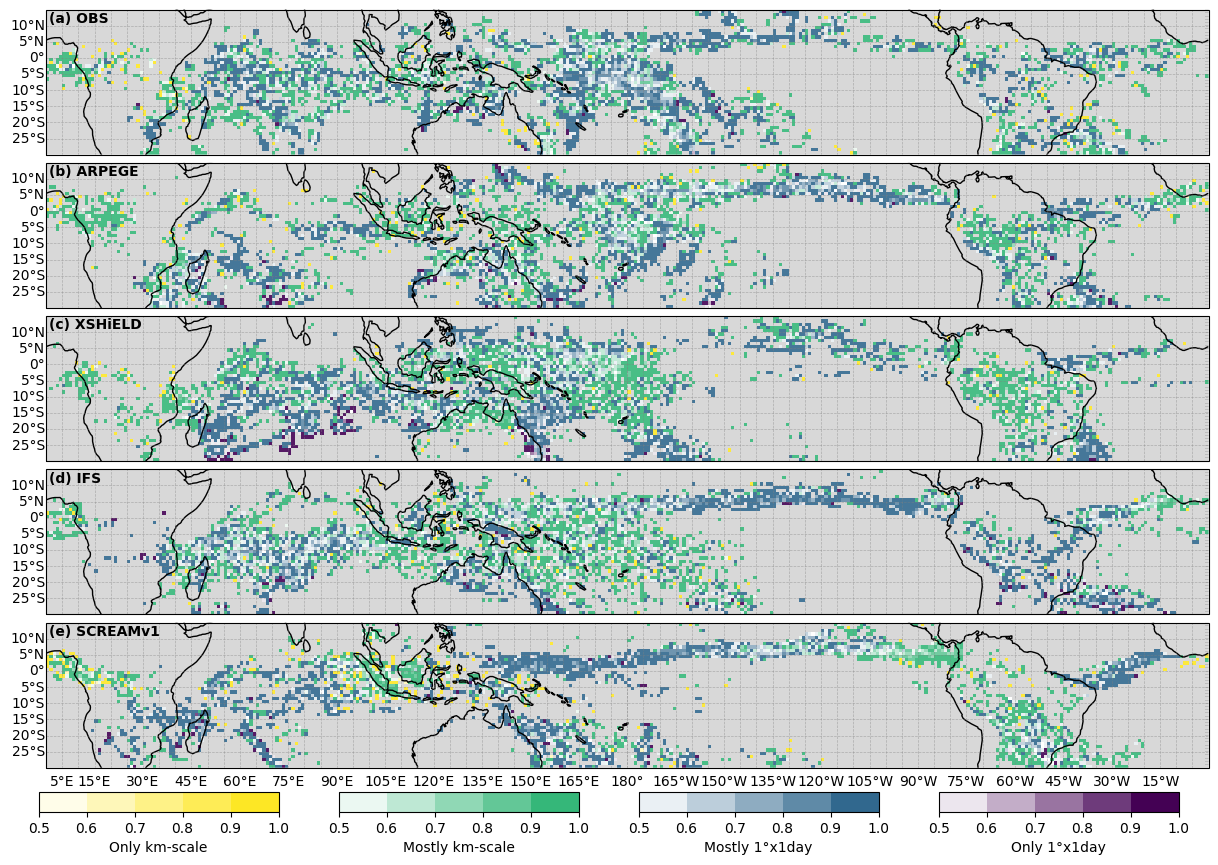

In [8]:
overwrite = False ## datalayers
if overwrite : list_4_mask_yxt = []
#### fig 3 maps 
import matplotlib.pyplot as plt
import numpy as np

colormaps = cmaps
# Norms (assuming same boundaries for simplification)
norms = [mpl.colors.BoundaryNorm([0.5, 0.6, 0.7, 0.8, 0.9, 1], colormap.N) for colormap in colormaps]

#### This block makes mask_all 
rank_conv_min = 99
rank_acc_min = 99
mask_alls =[]


for jd in jds: 
    jd.make_mask()
    mask_rank_conv = np.outer(jd.dist1.ranks >= 0, jd.dist2.ranks >= rank_conv_min)
    mask_rank_acc = np.outer(jd.dist1.ranks >= rank_acc_min , jd.dist2.ranks >= 0)
    mask_alls.append([
        np.logical_and(jd.mask_branch1_90, mask_rank_conv), 
        np.logical_and(jd.mask_coloc_c_90, mask_rank_conv), 
        np.logical_and(jd.mask_coloc_ac_90, mask_rank_acc), 
        np.logical_and(jd.mask_branch2_90, mask_rank_acc)
    ])

# Calculate figure size based on jd grid
dlon = np.diff((jds[0].grid.casestudy.lon_slice.start, jds[0].grid.casestudy.lon_slice.stop))[0] % 360
if dlon == 0: dlon = 360
dlat = np.diff((jds[0].grid.casestudy.lat_slice.start, jds[0].grid.casestudy.lat_slice.stop))[0]
Lx_fig = 15
Lx_cbar = 1.5
Ly_title = 1
Ly_fig = (Lx_fig - Lx_cbar) / dlon * dlat + Ly_title
print('figure size =', Lx_fig, Ly_fig)

# Initialize figure with subplots
fig, axes = plt.subplots(len(jds), 1, figsize=(Lx_fig, Ly_fig * len(jds)/1.35), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})
letters = ["("+chr(97 + i)+")" for i in range(len(jds))]  

if len(jds) == 1:
    axes = [axes]

for jd, mask_all, ax, letter in zip(jds, mask_alls, axes, letters):
    jd_output = os.path.join(jd.settings["DIR_DATA_OUT"], jd.name)
    data_file = os.path.join(jd_output, 'map_data_layers.pkl')
    map_no_extremes_file = os.path.join(jd_output, 'map_no_extremes.pkl')

    if not overwrite and os.path.exists(data_file):
        print(f"Loading data_layers from {data_file}.")
        data_layers = load_data(data_file)
        mask_no_extremes = load_data(map_no_extremes_file)

    else:
        print(f"Computing data_layers and saving to {data_file}.")
        list_mask_yxt = []
        for mask_ranked, cmap in zip(mask_all, colormaps):
            mask_yxt = jd.get_mask_yxt_from_mask_jdist(mask_ranked)
            list_mask_yxt.append(mask_yxt)
        list_4_mask_yxt.append(list_mask_yxt)
        mask_yxt_stacked = np.stack(list_mask_yxt)
        mask_no_extremes = np.sum(mask_yxt_stacked, axis = (0,-1))!=0
        mask_yxt_stacked = np.sum(mask_yxt_stacked, axis=-1) / np.sum(mask_yxt_stacked, axis=(0, -1)) ## axis 0 is class, last axis is days
        data_layers = [data for data in mask_yxt_stacked]
        for data in data_layers:
            data[data < 0.5] = np.nan

        save_data(data_file, data_layers)
        save_data(map_no_extremes_file, mask_no_extremes)

    lat_1d = jd.get_coord_values('lat')
    lon_1d = jd.get_coord_values('lon')
    lon_meshgrid, lat_meshgrid = np.meshgrid(lon_1d, lat_1d)

    im = ax.pcolormesh(lon_meshgrid, lat_meshgrid, mask_no_extremes, transform=ccrs.PlateCarree(), alpha=0.3, cmap=cmap_grey, norm=norm_grey)
  
    for i, (data, colormap, norm) in enumerate(zip(data_layers, colormaps, norms)):
        with warnings.catch_warnings():
            warnings.simplefilter('ignore')
            im = ax.pcolormesh(lon_meshgrid, lat_meshgrid, data, transform=ccrs.PlateCarree(), alpha=0.9, cmap=colormap, norm=norm)
    lat_letter = 11 if "Winter" in jd.name else 32
    ax.text(-179, lat_letter, letter+" "+jd.name.split("_")[0], color = 'k', fontweight='bold')
    # ax.set_title(jd.name.split("_")[0])
    ax.coastlines('110m')
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    gl.xlocator = mticker.FixedLocator(range(-180, 181, 5))
    gl.ylocator = mticker.FixedLocator(range(-90, 91, 5))
    gl.top_labels = False  # Turn off labels on top x-axis
    gl.right_labels = False  # Turn off labels on right y-axis
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    if letter in ['(e)']:
        gl.bottom_labels = True
    else:
        gl.bottom_labels = False

# Each colorbar: horizontally at the bottom
# adjust bottom_y, height, left_x, and width as needed
bottom_y = 0.07     # vertical position for colorbars
height   = 0.02     # colorbar thickness
left_x   = 0.12     # where the first colorbar starts
width    = 0.16     # each colorbar width
x_step   = 0.2    # horizontal step to place next colorbar

names = ["Only km-scale", "Mostly km-scale", "Mostly 1°x1day", "Only 1°x1day"]
for i, (cmap, norm, name) in enumerate(zip(colormaps, norms, names)):
    cax = fig.add_axes([left_x + i*x_step, bottom_y, width, height])
    cbar = fig.colorbar(
        mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
        cax=cax,
        orientation='horizontal',
        ticks=[0.5, 0.6, 0.7, 0.8, 0.9, 1]  # same tick settings as before
    )
    # Add a title/label for each colorbar:
    cbar.set_label(name, fontsize=10)
plt.subplots_adjust(hspace=0.0)
plt.savefig("final_fig/fig6.png", bbox_inches='tight', pad_inches=0.1)

# Fig5

In [14]:
settings_paths = [
"settings/obs_winter_30d.yaml",
"settings/sam_winter_30d.yaml", 
"settings/arpege_winter_30d.yaml", 
"settings/ifs_winter_30d.yaml", 
"settings/um_winter_30d.yaml",
"settings/xshield_winter_30d.yaml" , 
"settings/geos_winter_30d.yaml", 
"settings/screamv1_winter_30d.yaml",
"settings/grist_winter_30d.yaml", 
"settings/mpas_winter_30d.yaml", 
               ]

hdlrs = [handler.Handler(settings_path) for settings_path in settings_paths]
css = [casestudy.CaseStudy(hdlr, overwrite = False ,verbose = False) for hdlr in hdlrs]
grs = [grid.Grid(cs, fast = True, overwrite= False, verbose_steps = False, verbose = False) for cs in css]
jds = [joint_distrib.JointDistribution(gr, None, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_75_Prec", 
        nbpd = 20,  nd=4, overwrite = True, dist_mask = False) for gr in grs]

Data loaded from /scratchx/mcarenso/tempest/OBS_Winter_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/SAM_Winter_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/ARPEGE_Winter_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/IFS_Winter_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/UM_Winter_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/XSHiELD_Winter_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/GEOS_Winter_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/SCREAMv1_Winter_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/GRIST_Winter_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/MPAS_Winter_lowRes_Tropics/var_id_days_i_t.json
Found grid attributes file , so loading /scratchx/mcarenso/tempest/OBS_Wint

/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:1123: RuntimeWarning: invalid value encountered in divide
  hist = hist / dedges[i].reshape(shape)


Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recom

/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:1123: RuntimeWarning: invalid value encountered in divide
  hist = hist / dedges[i].reshape(shape)


Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them


In [15]:
#### This block makes mask_all 
rank_conv_min = 99
rank_acc_min = 99
mask_alls =[]

overwrite = True ## datalayers
if overwrite : list_4_mask_yxt = []

for jd in jds: 
    jd.make_mask()
    mask_rank_conv = np.outer(jd.dist1.ranks >= 0, jd.dist2.ranks >= rank_conv_min)
    mask_rank_acc = np.outer(jd.dist1.ranks >= rank_acc_min , jd.dist2.ranks >= 0)
    mask_alls.append([
        np.logical_and(jd.mask_branch1_90, mask_rank_conv), 
        np.logical_and(jd.mask_coloc_c_90, mask_rank_conv), 
        np.logical_and(jd.mask_coloc_ac_90, mask_rank_acc), 
        np.logical_and(jd.mask_branch2_90, mask_rank_acc)
    ])

for jd, mask_all in zip(jds, mask_alls):
    jd_output = os.path.join(jd.settings["DIR_DATA_OUT"], jd.name)
    data_file = os.path.join(jd_output, 'map_data_layers.pkl')
    map_no_extremes_file = os.path.join(jd_output, 'map_no_extremes.pkl')
    print(jd.name)
    list_mask_yxt = []
    for mask_ranked in mask_all:
        mask_yxt = jd.get_mask_yxt_from_mask_jdist(mask_ranked)
        list_mask_yxt.append(mask_yxt)
    list_4_mask_yxt.append(list_mask_yxt)

OBS_Winter_lowRes_Tropics
SAM_Winter_lowRes_Tropics


ARPEGE_Winter_lowRes_Tropics
IFS_Winter_lowRes_Tropics
UM_Winter_lowRes_Tropics
XSHiELD_Winter_lowRes_Tropics
GEOS_Winter_lowRes_Tropics
SCREAMv1_Winter_lowRes_Tropics
GRIST_Winter_lowRes_Tropics
MPAS_Winter_lowRes_Tropics


In [16]:
def convert_lon_0_360(data, lon_array):
    """
    Reorder 'data' (shape: (lat, lon, days))
    so that longitudes go from 0 to 360,
    assuming 'lon_array' goes from -180 to 180.
    """
    # Shift all negative longitudes into [0, 360)
    lon_mod = (lon_array + 360) % 360
    # Sort the shifted longitudes
    sort_idx = np.argsort(lon_mod)  # indices that would sort lon_mod
    # Reorder the data array along its longitude axis (which is axis=1 here)
    if len(data.shape)==1:
        print("NON TU N'AS PAS LE DROIT")
    elif len(data.shape)==2 : 
        data_sorted = data[:,sort_idx] 
    elif len(data.shape)==3 : 
        data_sorted = data[:,sort_idx, :] 

    return data_sorted

list_4_mask_yxt_wpp = []

lat_1d = jd.get_coord_values('lat')
lon_1d = jd.get_coord_values('lon')
lon_meshgrid, lat_meshgrid = np.meshgrid(lon_1d, lat_1d)

#build lon_0_360 here
lon_0_360 = np.sort((lon_1d + 360) % 360)
mask_wpp = (lon_0_360 >= 100) & (lon_0_360 <= 260) 
# mask_wpp = (lon_0_360 >= 0) & (lon_0_360 <= 360) 

for list_4_categories in list_4_mask_yxt:
    this_model_list_4_mask = []
    for this_cat_data in list_4_categories:
        data_0_360 = convert_lon_0_360(this_cat_data, lon_1d)
        data_0_360_nodays = np.sum(data_0_360, axis=2)
        data_sub = data_0_360_nodays[:, mask_wpp]
        this_model_list_4_mask.append(data_sub)
    list_4_mask_yxt_wpp.append(this_model_list_4_mask)

lon_mesh_wpp = convert_lon_0_360(lon_meshgrid, lon_1d)[:, mask_wpp]
lat_mesh_wpp = convert_lon_0_360(lat_meshgrid, lon_1d)[:, mask_wpp]

mask_ocean_wpp = grs[0].mask_ocean[:,:,0][:, mask_wpp]
mask_land_wpp = grs[0].mask_land[:,:,0][:, mask_wpp]

plot_bool = False
if plot_bool :
    fig, ax = plt.subplots(1, 1, figsize = (20, 10), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})
    test_data  = list_4_mask_yxt_wpp[0][2]
    im = ax.pcolormesh(lon_mesh_wpp, lat_mesh_wpp, test_data, transform=ccrs.PlateCarree(), alpha=1)
    plt.colorbar(im)

    # ax.set_title(jd.name.split("_")[0])
    ax.coastlines('110m')
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    gl.xlocator = mticker.FixedLocator(range(-180, 181, 5))
    gl.ylocator = mticker.FixedLocator(range(-90, 91, 5))
    gl.top_labels = False  # Turn off labels on top x-axis
    gl.right_labels = False  # Turn off labels on right y-axis
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

In [17]:
import numpy as np

# Example:
# list_4_mask_yxt_wpp is a list of length N (N "scenarios")
# Each element is a list of 4 NumPy arrays, e.g. [arr0, arr1, arr2, arr3]
# mask_land_wpp and mask_ocean_wpp are boolean (or 0/1) arrays of the same shape 
# as each of the data arrays, indicating which gridcells are land and which are ocean.

def compute_land_ocean_differences(list_4_mask_yxt_wpp, mask_land_wpp, mask_ocean_wpp):
    """
    Computes, for each scenario i in list_4_mask_yxt_wpp, the sum of absolute 
    differences w.r.t. the scenario[0] arrays, split by land vs. ocean.

    Parameters
    ----------
    list_4_mask_yxt_wpp : list of length N
        Each item is a list of 4 NumPy arrays of shape (...),
        e.g. [arr0, arr1, arr2, arr3].
    mask_land_wpp : NumPy boolean array of shape (...) 
        True (or 1) for land points, same shape as each data array.
    mask_ocean_wpp : NumPy boolean array of shape (...)
        True (or 1) for ocean points, same shape as each data array.

    Returns
    -------
    results : list of length N
        Each element is a list of 4 tuples (sum_land, sum_ocean).
        results[i][j] => (sum of abs differences on land, sum of abs differences on ocean)
        for scenario i and array j.
    """
    # Take the scenario-0 arrays as reference
    ref_arrays = list_4_mask_yxt_wpp[0]  # This is [ref_arr0, ref_arr1, ref_arr2, ref_arr3]

    score_results = []
    results_rel_land = []
    results_rel_ocean = []
    total_land_model = []
    total_ocean_model = []
    ref_land = []
    ref_ocean = []
    # Loop over each scenario
    for i, scenario_arrays in enumerate(list_4_mask_yxt_wpp):
        scenario_result = []
        total_diff = 0
        total_ref = 0
        total_land_ref = 0
        total_ocean_ref = 0
        land_model = 0
        ocean_model = 0
        # scenario_arrays is also a list of 4 arrays
        for j in range(4):
            
            ref_arr = ref_arrays[j]
            arr = scenario_arrays[j]
            # Compute element-wise absolute difference
            diff = np.abs(arr - ref_arr)
            total_diff += diff.sum()
            total_ref +=ref_arr.sum()

            land = np.sum(arr[mask_land_wpp])
            ocean = np.sum(arr[mask_ocean_wpp])

            land_model += land
            ocean_model += ocean
            if i==0 : 
                ref_land.append(land)
                ref_ocean.append(ocean)

            diff_land = (np.sum(arr[mask_land_wpp]) - np.sum(ref_arr[mask_land_wpp]))
            diff_ocean = (np.sum(arr[mask_ocean_wpp]) - np.sum(ref_arr[mask_ocean_wpp]))

            total_land_ref += np.sum(ref_arr[mask_land_wpp])
            total_ocean_ref += np.sum(ref_arr[mask_ocean_wpp])

            # Store the (land, ocean) tuple for this array
            scenario_result.append([diff_land, diff_ocean])
        
        rel_total_diff = np.round(total_diff/total_ref,3)
        score_results.append(rel_total_diff)

        this_rel_land =[]
        this_rel_ocean = []

        total_land_model.append(land_model)
        total_ocean_model.append(ocean_model)

        for diff_land, diff_ocean in scenario_result:
            this_rel_land.append(np.round(diff_land/total_land_ref,2))
            this_rel_ocean.append(np.round(diff_ocean/total_ocean_ref,2))

        results_rel_land.append(this_rel_land)
        results_rel_ocean.append(this_rel_ocean)

    return  total_land_ref, total_land_model, ref_land, total_ocean_ref, total_ocean_model, ref_ocean, np.array(score_results), np.array(results_rel_land), np.array(results_rel_ocean)

n_land, models_land, ref_land, n_ocean,  models_ocean, ref_ocean, score_results, rel_land, rel_ocean= compute_land_ocean_differences(list_4_mask_yxt_wpp, mask_land_wpp, mask_ocean_wpp)

In [18]:
print(f"\t\t\t Land ({n_land}) \t\t\t Ocean ({n_ocean})")
print(f"models \t\t\t I {ref_land[0]}, II {ref_land[1]}, III {ref_land[2]}, IV {ref_land[3]} \t-\t I {ref_ocean[0]}, II {ref_ocean[1]}, III {ref_ocean[2]}, IV {ref_ocean[3]}")

for i, model, result, model_land, model_ocean in zip(np.arange(len(score_results)), settings_paths, score_results, models_land, models_ocean):
    name = model.split("/")[1].split("_")[0]
    print(name, "score = ", np.round(result,3) , "\t", 
        model_land, np.round(rel_land[i],2),
        model_ocean, np.round(rel_ocean[i],2))
    
model_names = ["SAM", "ARPEGE", "IFS", "UM", "XSHiELD", "GEOS", "SCREAMv1", "GRIST", "MPAS"]
model_names = [model_name + f" ({np.round(result, 3)}) #" for model_name, result in zip(model_names, score_results[1:])]
columns_land = [f"'Only km'  \n #{ref_land[0]}", f"'Mostly km' \n #{ref_land[1]}", f"'Mostly dd' \n #{ref_land[2]}", f"'Only dd' \n #{ref_land[3]}"]
columns_ocean = [f"'Only km'  \n #{ref_ocean[0]}", f"'Mostly km' \n #{ref_ocean[1]}", f"'Mostly dd' \n #{ref_ocean[2]}", f"'Only dd' \n #{ref_ocean[3]}"]
# Create pandas DataFrames for easier plotting

# Create pandas DataFrames for easier plotting
df_land = pd.DataFrame(100*rel_land[1:], index=model_names, columns=columns_land)
df_ocean = pd.DataFrame(100*rel_ocean[1:], index=model_names, columns=columns_ocean)

			 Land (687) 			 Ocean (4016)
models 			 I 56, II 297, III 316, IV 18 	-	 I 83, II 1561, III 2339, IV 33
obs score =  0.0 	 687 [0. 0. 0. 0.] 4016 [0. 0. 0. 0.]
sam score =  1.471 	 1143 [ 0.04  0.72 -0.1   0.01] 3374 [ 0.01 -0.05 -0.15  0.03]
arpege score =  1.494 	 1234 [0.04 0.5  0.22 0.03] 4013 [ 0.01  0.01 -0.03  0.01]
ifs score =  1.507 	 1226 [0.02 0.38 0.37 0.01] 3954 [ 0.02  0.12 -0.16  0.01]
um score =  1.51 	 1526 [ 0.08  0.74  0.41 -0.01] 3520 [-0.01  0.01 -0.12 -0.  ]
xshield score =  1.553 	 1329 [0.01 0.72 0.16 0.05] 4019 [ 0.    0.06 -0.07  0.01]
geos score =  1.578 	 1326 [0.   0.6  0.31 0.02] 3302 [ 0.   -0.08 -0.14  0.04]
screamv1 score =  1.58 	 1134 [0.07 0.52 0.05 0.01] 3078 [ 0.01 -0.19 -0.06  0.01]
grist score =  1.622 	 2024 [0.08 1.46 0.38 0.03] 3042 [-0.   -0.14 -0.13  0.02]
mpas score =  1.67 	 1171 [ 0.02  0.56  0.13 -0.01] 4914 [0.   0.11 0.1  0.02]


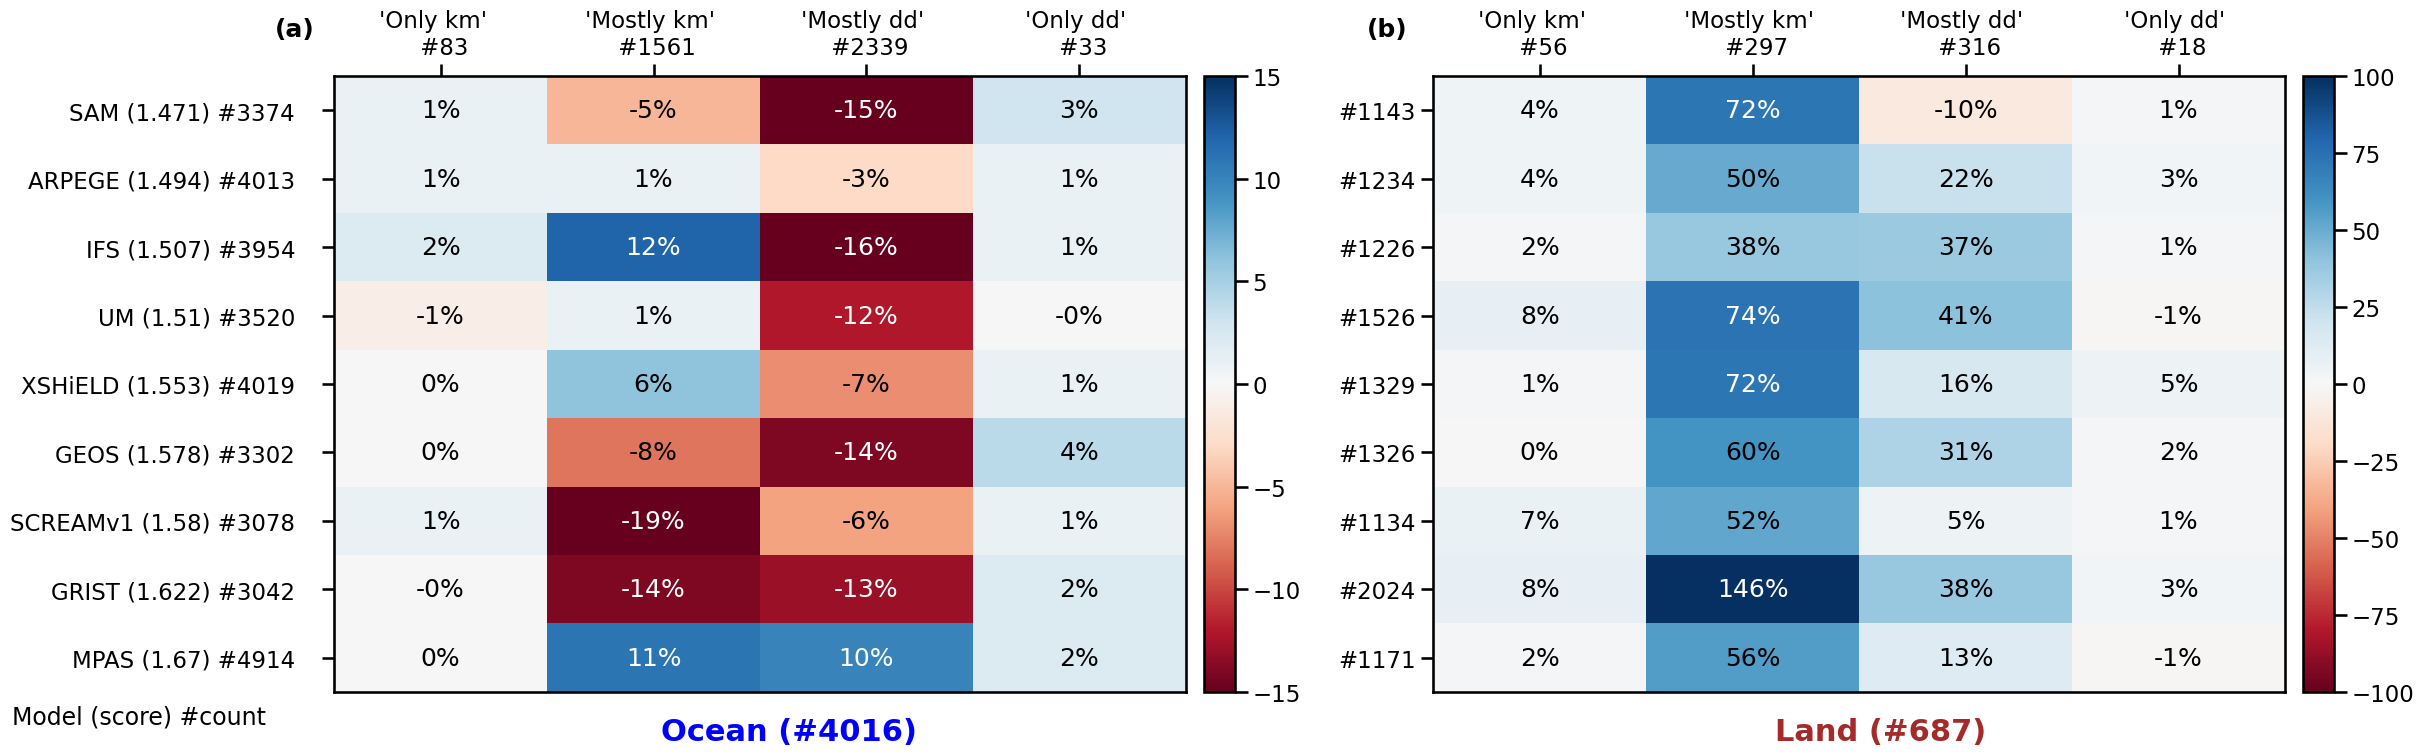

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Apply Seaborn styling
sns.set_context("talk") 

def plot_heatmap_no_seaborn(df, models_tot, title="Heatmap", cmap="RdBu", ax = None, no_index = False, absmax=None):
    """
    Plots a 'heatmap' using Matplotlib's imshow, with manual cell annotations.

    Parameters
    ----------
    df : pandas DataFrame
        2D data to plot, shape (n_rows, n_cols).
    title : str
        Title of the plot.
    cmap : str
        Colormap name (e.g., 'RdBu', 'coolwarm', 'viridis').
    """

    # Determine symmetric color limits around zero (if your data is centered)
    if absmax is None : 
        absmax = np.abs(df.values).max()

    # Display the data as an image
    im = ax.imshow(df.values, cmap=cmap, vmin=-absmax, vmax=absmax, aspect = "auto")

    # Add a colorbar
    cbar = plt.colorbar(im, ax=ax, fraction=0.05, pad=0.02)
    # cbar.set_label("Relative Difference", fontsize=12, weight='bold')

    # Set tick positions and labels
    ax.set_xticks(np.arange(df.shape[1]))
    ax.set_yticks(np.arange(df.shape[0]))
    ax.set_xticklabels(df.columns, rotation=0, ha="center")  # rotate column labels
    if no_index : 
        name_row = ["#"+str(model)for model in models_tot]
    else : 
        name_row = df.index+[str(model)+"   " for model in models_tot]
    ax.set_yticklabels(name_row)
    ax.xaxis.tick_top()  # Move xticks to the top

    # Annotate each cell with its numeric value
    for i in range(df.shape[0]):
        for j in range(df.shape[1]):
            text_color = "white" if abs(df.iloc[i, j]) > absmax * 0.6 else "black"  
            ax.text(j, i, f"{df.iloc[i, j]:.0f}%", ha="center", va="center", color=text_color)


    # ax.set_title(title, fontsize=20)
    # ax.set_ylabel("Models", fontsize=14)

# -- Example usage with your DataFrames: df_land and df_ocean --
fig, axs = plt.subplots(1, 2, figsize=(26, 8))

plot_heatmap_no_seaborn(df_land, models_land[1:], title=f"(b)", cmap="RdBu", ax = axs[1], no_index = True, absmax=100)
plot_heatmap_no_seaborn(df_ocean, models_ocean[1:], title=f"(a)", cmap="RdBu", ax = axs[0], no_index = False, absmax=15)

# Add "Land" and "Ocean" labels below the heatmaps
fig.text(0.72, 0.05, f"Land (#{n_land})", fontsize=22, fontweight='bold', color="brown", ha="center")
fig.text(0.30, 0.05, f"Ocean (#{n_ocean})", fontsize=22, fontweight='bold', color="blue", ha="center")

fig.text(0.11, 0.93, f"(a)", fontsize=18, fontweight='bold',  ha="center")
fig.text(0.53, 0.93, f"(b)", fontsize=18, fontweight='bold', ha="center")

fig.text(0.05, 0.07, f"Model (score) #count", fontsize=17,   ha="center")

plt.savefig("final_fig/fig5.pdf", bbox_inches = "tight", pad_inches=0.1)
plt.show()

## for Summer out of curiosity

In [ ]:
# settings_path = 'settings/sam_4km_30min_30d.yaml'

### WINTER + SUMMER###
settings_paths = [
"settings/obs_summer_30d.yaml",
"settings/arpege_summer_30d.yaml", 
"settings/ifs_summer_30d.yaml",
"settings/mpas_summer_30d.yaml", 
"settings/screamv1_summer_30d.yaml", 
"settings/sam_summer_30d.yaml", 
"settings/um_summer_30d.yaml",
"settings/fv3_summer_30d.yaml",  
"settings/nicam_summer_30d.yaml", 
               ]

hdlrs = [handler.Handler(settings_path) for settings_path in settings_paths]
css = [casestudy.CaseStudy(hdlr, overwrite = False ,verbose = False) for hdlr in hdlrs]
grs = [grid.Grid(cs, fast = True, overwrite= False, verbose_steps = False, verbose = False) for cs in css]
jds = [joint_distrib.JointDistribution(gr, None, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_75_Prec", 
        nbpd = 20,  nd=5, overwrite = True, dist_mask = False) for gr in grs]

lm = grs[0].get_landmask()
ocean = lm.Landmask == 0
ocean = ocean.values[:,:,np.newaxis]

Data loaded from /scratchx/mcarenso/tempest/OBS_Summer_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/ARPEGE_Summer_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/IFS_Summer_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/MPAS_Summer_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/SCREAMv1_Summer_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/SAM_Summer_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/UM_Summer_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/FV3_Summer_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/NICAM_Summer_lowRes_Tropics/var_id_days_i_t.json
Found grid attributes file , so loading /scratchx/mcarenso/tempest/OBS_Summer_lowRes_Tropics/grid_attributes.pkl instead of computing
Found grid attributes file , so loadi

/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them


/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:1123: RuntimeWarning: invalid value encountered in divide
  hist = hist / dedges[i].reshape(shape)


Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them


In [34]:
#### This block makes mask_all 
rank_conv_min = 99
rank_acc_min = 99
mask_alls =[]

overwrite = True ## datalayers
if overwrite : list_4_mask_yxt = []

for jd in jds: 
    jd.make_mask()
    mask_rank_conv = np.outer(jd.dist1.ranks >= 0, jd.dist2.ranks >= rank_conv_min)
    mask_rank_acc = np.outer(jd.dist1.ranks >= rank_acc_min , jd.dist2.ranks >= 0)
    mask_alls.append([
        np.logical_and(jd.mask_branch1_90, mask_rank_conv), 
        np.logical_and(jd.mask_coloc_c_90, mask_rank_conv), 
        np.logical_and(jd.mask_coloc_ac_90, mask_rank_acc), 
        np.logical_and(jd.mask_branch2_90, mask_rank_acc)
    ])

for jd, mask_all in zip(jds, mask_alls):
    jd_output = os.path.join(jd.settings["DIR_DATA_OUT"], jd.name)
    data_file = os.path.join(jd_output, 'map_data_layers.pkl')
    map_no_extremes_file = os.path.join(jd_output, 'map_no_extremes.pkl')
    print(jd.name)
    list_mask_yxt = []
    for mask_ranked in mask_all:
        mask_yxt = jd.get_mask_yxt_from_mask_jdist(mask_ranked)
        list_mask_yxt.append(mask_yxt)
    list_4_mask_yxt.append(list_mask_yxt)

OBS_Summer_lowRes_Tropics
ARPEGE_Summer_lowRes_Tropics
IFS_Summer_lowRes_Tropics
MPAS_Summer_lowRes_Tropics
SCREAMv1_Summer_lowRes_Tropics
SAM_Summer_lowRes_Tropics
UM_Summer_lowRes_Tropics
FV3_Summer_lowRes_Tropics
NICAM_Summer_lowRes_Tropics


Text(0, 0.5, 'Latitude')

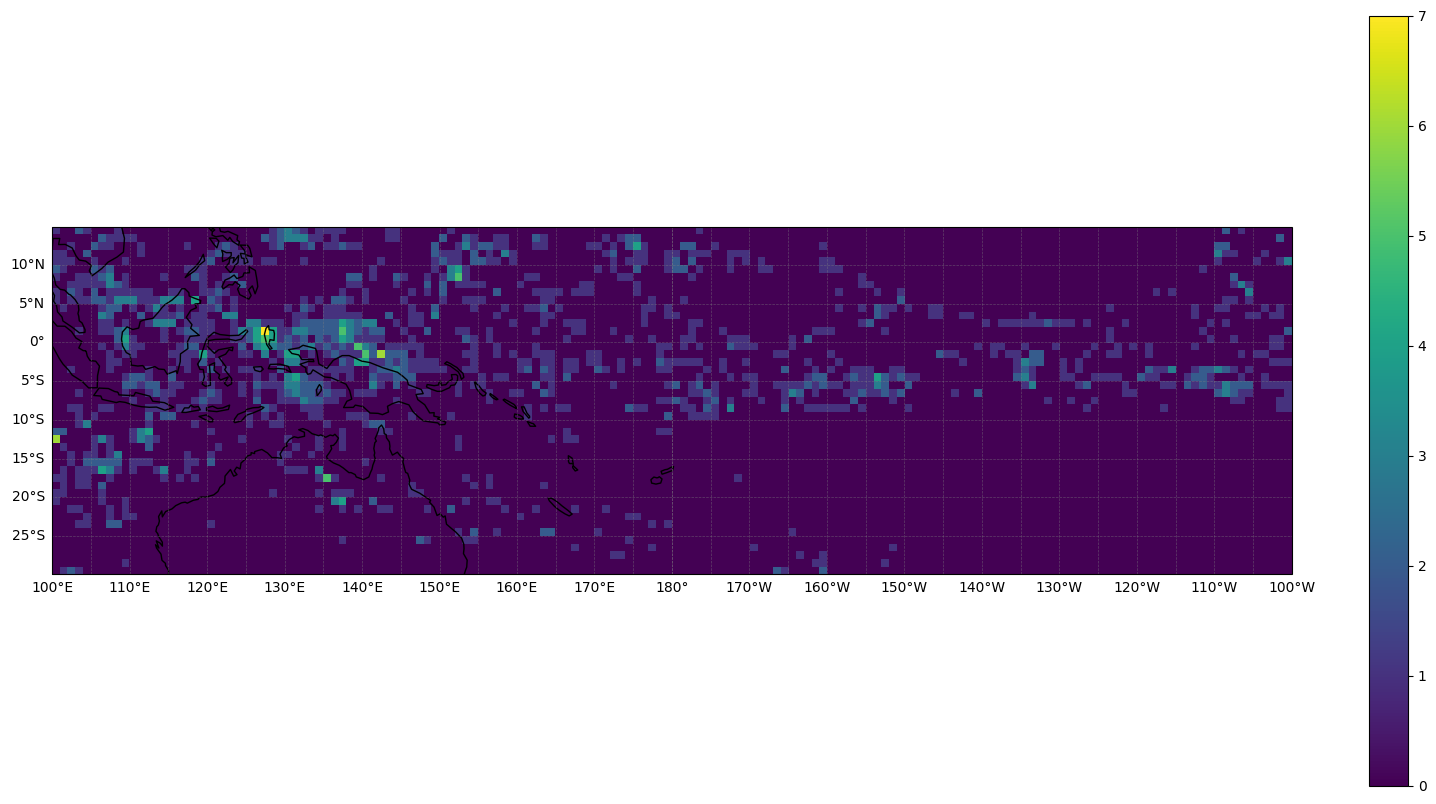

In [35]:
def convert_lon_0_360(data, lon_array):
    """
    Reorder 'data' (shape: (lat, lon, days))
    so that longitudes go from 0 to 360,
    assuming 'lon_array' goes from -180 to 180.
    """
    # Shift all negative longitudes into [0, 360)
    lon_mod = (lon_array + 360) % 360
    # Sort the shifted longitudes
    sort_idx = np.argsort(lon_mod)  # indices that would sort lon_mod
    # Use sorted indices to reorder longitudes
    lon_sorted = lon_mod[sort_idx]
    # Reorder the data array along its longitude axis (which is axis=1 here)
    if len(data.shape)==1:
        print("NON TU N'AS PAS LE DROIT")
    elif len(data.shape)==2 : 
        data_sorted = data[:,sort_idx] 
    elif len(data.shape)==3 : 
        data_sorted = data[:,sort_idx] 

    return data_sorted

list_4_mask_yxt_wpp = []

lon_0_360 = np.sort((lon_1d + 360) % 360)

mask_wpp = (lon_0_360 >= 100) & (lon_0_360 <= 260)

for list_4_categories in list_4_mask_yxt:
    this_model_list_4_mask = []
    for this_cat_data in list_4_categories:
        data_0_360 = convert_lon_0_360(this_cat_data, lon_1d)
        data_0_360_nodays = np.sum(data_0_360, axis=2)
        data_sub = data_0_360_nodays[:, mask_wpp]
        this_model_list_4_mask.append(data_sub)
    list_4_mask_yxt_wpp.append(this_model_list_4_mask)

lon_mesh_wpp = convert_lon_0_360(lon_meshgrid, lon_1d)[:, mask_wpp]
lat_mesh_wpp = convert_lon_0_360(lat_meshgrid, lon_1d)[:, mask_wpp]

mask_ocean_wpp = grs[0].mask_ocean[:,:,0][:, mask_wpp]
mask_land_wpp = grs[0].mask_land[:,:,0][:, mask_wpp]

## Now plot
fig, ax = plt.subplots(1, 1, figsize = (20, 10), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})
test_data  = list_4_mask_yxt_wpp[0][1]
im = ax.pcolormesh(lon_mesh_wpp, lat_mesh_wpp, test_data, transform=ccrs.PlateCarree(), alpha=1)
plt.colorbar(im)

ax.coastlines('110m')
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.xlocator = mticker.FixedLocator(range(-180, 181, 5))
gl.ylocator = mticker.FixedLocator(range(-90, 91, 5))
gl.top_labels = False  # Turn off labels on top x-axis
gl.right_labels = False  # Turn off labels on right y-axis
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

In [36]:
import numpy as np

# Example:
# list_4_mask_yxt_wpp is a list of length N (N "scenarios")
# Each element is a list of 4 NumPy arrays, e.g. [arr0, arr1, arr2, arr3]
# mask_land_wpp and mask_ocean_wpp are boolean (or 0/1) arrays of the same shape 
# as each of the data arrays, indicating which gridcells are land and which are ocean.

def compute_land_ocean_differences(list_4_mask_yxt_wpp, mask_land_wpp, mask_ocean_wpp):
    """
    Computes, for each scenario i in list_4_mask_yxt_wpp, the sum of absolute 
    differences w.r.t. the scenario[0] arrays, split by land vs. ocean.

    Parameters
    ----------
    list_4_mask_yxt_wpp : list of length N
        Each item is a list of 4 NumPy arrays of shape (...),
        e.g. [arr0, arr1, arr2, arr3].
    mask_land_wpp : NumPy boolean array of shape (...) 
        True (or 1) for land points, same shape as each data array.
    mask_ocean_wpp : NumPy boolean array of shape (...)
        True (or 1) for ocean points, same shape as each data array.

    Returns
    -------
    results : list of length N
        Each element is a list of 4 tuples (sum_land, sum_ocean).
        results[i][j] => (sum of abs differences on land, sum of abs differences on ocean)
        for scenario i and array j.
    """
    # Take the scenario-0 arrays as reference
    ref_arrays = list_4_mask_yxt_wpp[0]  # This is [ref_arr0, ref_arr1, ref_arr2, ref_arr3]

    score_results = []
    results_rel_land = []
    results_rel_ocean = []
    total_land_model = []
    total_ocean_model = []
    ref_land = []
    ref_ocean = []
    # Loop over each scenario
    for i, scenario_arrays in enumerate(list_4_mask_yxt_wpp):
        scenario_result = []
        total_diff = 0
        total_ref = 0
        total_land_ref = 0
        total_ocean_ref = 0
        land_model = 0
        ocean_model = 0
        # scenario_arrays is also a list of 4 arrays
        for j in range(4):
            
            ref_arr = ref_arrays[j]
            arr = scenario_arrays[j]
            # Compute element-wise absolute difference
            diff = np.abs(arr - ref_arr)
            total_diff += diff.sum()
            total_ref +=ref_arr.sum()

            land = np.sum(arr[mask_land_wpp])
            ocean = np.sum(arr[mask_ocean_wpp])

            land_model += land
            ocean_model += ocean
            if i==0 : 
                ref_land.append(land)
                ref_ocean.append(ocean)

            diff_land = (np.sum(arr[mask_land_wpp]) - np.sum(ref_arr[mask_land_wpp]))
            diff_ocean = (np.sum(arr[mask_ocean_wpp]) - np.sum(ref_arr[mask_ocean_wpp]))

            total_land_ref += np.sum(ref_arr[mask_land_wpp])
            total_ocean_ref += np.sum(ref_arr[mask_ocean_wpp])

            # Store the (land, ocean) tuple for this array
            scenario_result.append([diff_land, diff_ocean])
        
        rel_total_diff = np.round(total_diff/total_ref,3)
        score_results.append(rel_total_diff)

        this_rel_land =[]
        this_rel_ocean = []

        total_land_model.append(land_model)
        total_ocean_model.append(ocean_model)

        for diff_land, diff_ocean in scenario_result:
            this_rel_land.append(np.round(diff_land/total_land_ref,2))
            this_rel_ocean.append(np.round(diff_ocean/total_ocean_ref,2))

        results_rel_land.append(this_rel_land)
        results_rel_ocean.append(this_rel_ocean)

    return  total_land_ref, total_land_model, ref_land, total_ocean_ref, total_ocean_model, ref_ocean, np.array(score_results), np.array(results_rel_land), np.array(results_rel_ocean)

n_land, models_land, ref_land, n_ocean,  models_ocean, ref_ocean, score_results, rel_land, rel_ocean= compute_land_ocean_differences(list_4_mask_yxt_wpp, mask_land_wpp, mask_ocean_wpp)

In [37]:
print(f"\t\t\t Land ({n_land}) \t\t\t Ocean ({n_ocean})")
print(f"models \t\t\t I {ref_land[0]}, II {ref_land[1]}, III {ref_land[2]}, IV {ref_land[3]} \t-\t I {ref_ocean[0]}, II {ref_ocean[1]}, III {ref_ocean[2]}, IV {ref_ocean[3]}")

for i, model, result, model_land, model_ocean in zip(np.arange(len(score_results)), settings_paths, score_results, models_land, models_ocean):
    name = model.split("/")[1].split("_")[0]
    print(name, "score = ", np.round(result,3) , "\t", 
        model_land, np.round(rel_land[i],2),
        model_ocean, np.round(rel_ocean[i],2))
    
model_names = ["SAM", "ARPEGE", "IFS", "UM", "XSHiELD", "GEOS", "SCREAMv1", "GRIST", "MPAS"]
model_names = [model_name + f" ({np.round(result, 3)}) #" for model_name, result in zip(model_names, score_results[1:])]
columns_land = [f"'Only km'  \n #{ref_land[0]}", f"'Mostly km' \n #{ref_land[1]}", f"'Mostly dd' \n #{ref_land[2]}", f"'Only dd' \n #{ref_land[3]}"]
columns_ocean = [f"'Only km'  \n #{ref_ocean[0]}", f"'Mostly km' \n #{ref_ocean[1]}", f"'Mostly dd' \n #{ref_ocean[2]}", f"'Only dd' \n #{ref_ocean[3]}"]
# Create pandas DataFrames for easier plotting

# Create pandas DataFrames for easier plotting
df_land = pd.DataFrame(100*rel_land[1:], index=model_names, columns=columns_land)
df_ocean = pd.DataFrame(100*rel_ocean[1:], index=model_names, columns=columns_ocean)

			 Land (751) 			 Ocean (3697)
models 			 I 73, II 348, III 320, IV 10 	-	 I 47, II 1400, III 2217, IV 33
obs score =  0.0 	 751 [0. 0. 0. 0.] 3697 [0. 0. 0. 0.]
arpege score =  1.526 	 1003 [0.02 0.25 0.04 0.02] 3471 [ 0.04 -0.11 -0.01  0.02]
ifs score =  1.704 	 739 [-0.06  0.03 -0.01  0.03] 4450 [0.02 0.16 0.01 0.01]
mpas score =  1.561 	 1677 [ 0.37  0.87 -0.02  0.01] 3433 [ 0.01 -0.18  0.09  0.  ]
screamv1 score =  1.393 	 710 [ 0.04 -0.06 -0.04  0.  ] 2493 [ 0.01 -0.28 -0.08  0.03]
sam score =  1.536 	 1043 [-0.02  0.35  0.03  0.03] 3655 [ 0.03  0.02 -0.06  0.01]
um score =  1.556 	 1198 [0.07 0.31 0.21 0.01] 3892 [ 0.    0.11 -0.06  0.  ]
fv3 score =  1.501 	 789 [-0.06  0.05  0.05  0.01] 4243 [0.   0.09 0.05 0.  ]
nicam score =  1.409 	 719 [-0.04  0.04 -0.06  0.02] 3688 [ 0.02  0.06 -0.1   0.02]


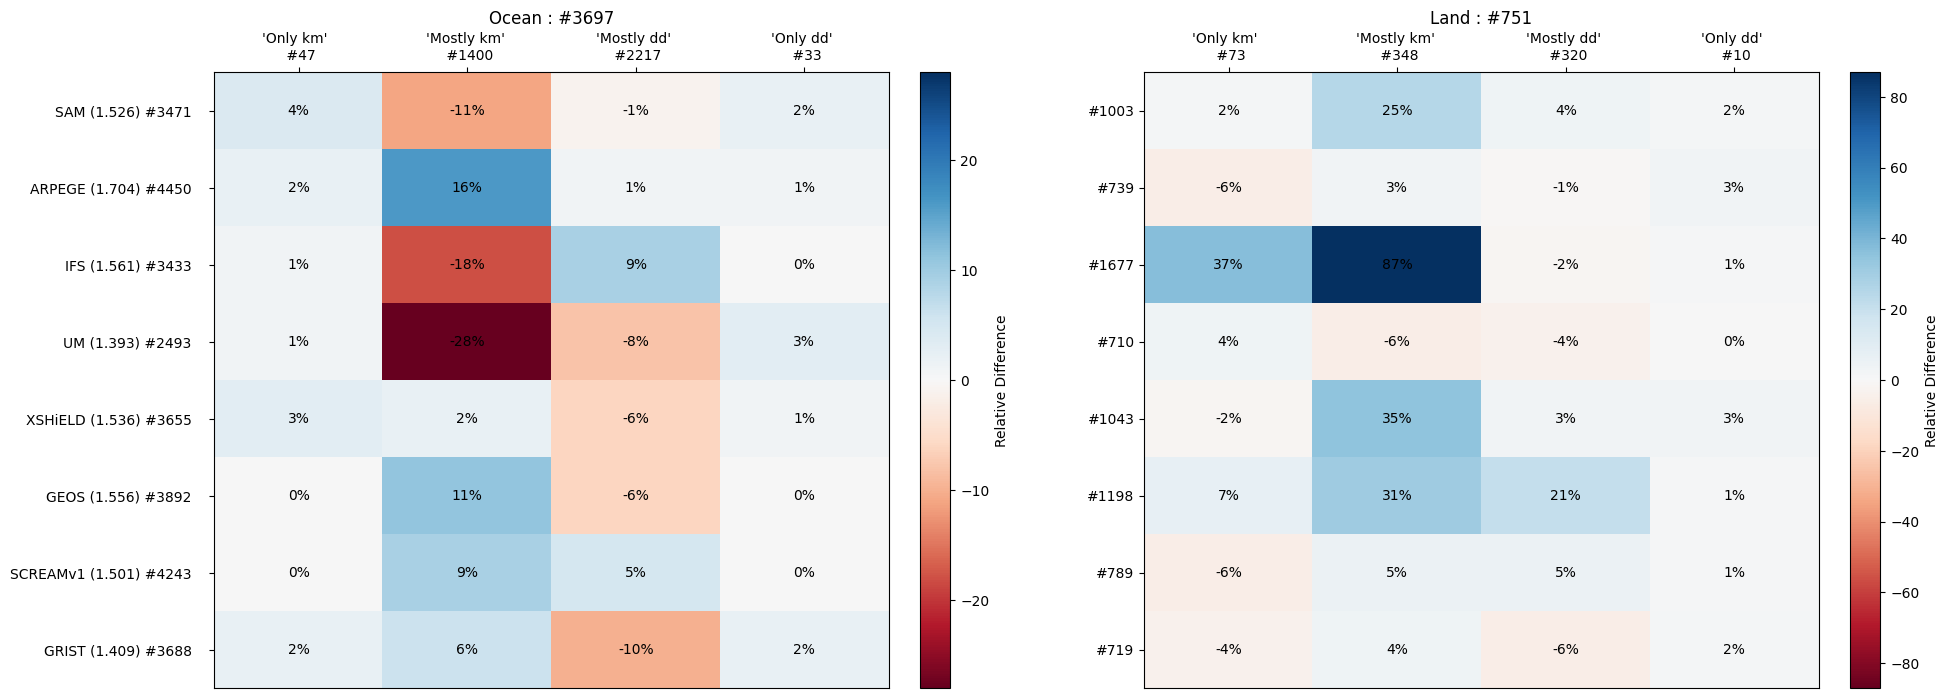

In [38]:
import numpy as np
import matplotlib.pyplot as plt

def plot_heatmap_no_seaborn(df, models_tot, title="Heatmap", cmap="RdBu", ax = None, no_index = False):
    """
    Plots a 'heatmap' using Matplotlib's imshow, with manual cell annotations.

    Parameters
    ----------
    df : pandas DataFrame
        2D data to plot, shape (n_rows, n_cols).
    title : str
        Title of the plot.
    cmap : str
        Colormap name (e.g., 'RdBu', 'coolwarm', 'viridis').
    """

    # Determine symmetric color limits around zero (if your data is centered)
    absmax = np.abs(df.values).max()

    # Display the data as an image
    im = ax.imshow(df.values, cmap=cmap, vmin=-absmax, vmax=absmax, aspect = "auto")

    # Add a colorbar
    cbar = plt.colorbar(im, ax=ax, fraction=0.09, pad=0.04)
    cbar.set_label("Relative Difference")

    # Set tick positions and labels
    ax.set_xticks(np.arange(df.shape[1]))
    ax.set_yticks(np.arange(df.shape[0]))
    ax.set_xticklabels(df.columns, rotation=0, ha="center")  # rotate column labels
    if no_index : 
        name_row = ["#"+str(model)for model in models_tot]
    else : 
        name_row = df.index+[str(model)+"   " for model in models_tot]
    ax.set_yticklabels(name_row)
    ax.xaxis.tick_top()  # Move xticks to the top

    # Annotate each cell with its numeric value
    for i in range(df.shape[0]):
        for j in range(df.shape[1]):
            ax.text(j, i, f"{df.iloc[i, j]:.0f}%",
                    ha="center", va="center", color="black")

    ax.set_title(title, fontsize=12)
    # ax.set_ylabel("Models", fontsize=14)



# -- Example usage with your DataFrames: df_land and df_ocean --
fig, axs = plt.subplots(1, 2, figsize=(22, 8))

plot_heatmap_no_seaborn(df_land, models_land[1:], title=f"Land : #{n_land}", cmap="RdBu", ax = axs[1], no_index = True)
plot_heatmap_no_seaborn(df_ocean, models_ocean[1:], title=f"Ocean : #{n_ocean}", cmap="RdBu", ax = axs[0], no_index = False)

plt.show()

# Supplementary Winter

In [39]:
# settings_path = 'settings/sam_4km_30min_30d.yaml'

### WINTER + SUMMER###
settings_paths = [
# "settings/obs_summer_30d.yaml",
"settings/obs_winter_30d.yaml",
# "settings/arpege_winter_30d.yaml", 
# "settings/xshield_winter_30d.yaml" , 
# "settings/ifs_winter_30d.yaml", 
# "settings/screamv1_winter_30d.yaml",
"settings/mpas_winter_30d.yaml", 
"settings/sam_winter_30d.yaml", 
"settings/um_winter_30d.yaml",
"settings/geos_winter_30d.yaml", 
"settings/grist_winter_30d.yaml", 
               ]

hdlrs = [handler.Handler(settings_path) for settings_path in settings_paths]
css = [casestudy.CaseStudy(hdlr, overwrite = False ,verbose = False) for hdlr in hdlrs]
grs = [grid.Grid(cs, fast = True, overwrite= False, verbose_steps = False, verbose = False) for cs in css]
jds = [joint_distrib.JointDistribution(gr, None, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_75_Prec", 
        nbpd = 20,  nd=5, overwrite = True, dist_mask = False) for gr in grs]

lm = grs[0].get_landmask()
ocean = lm.Landmask == 0
ocean = ocean.values[:,:,np.newaxis]

Data loaded from /scratchx/mcarenso/tempest/OBS_Winter_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/MPAS_Winter_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/SAM_Winter_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/UM_Winter_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/GEOS_Winter_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/GRIST_Winter_lowRes_Tropics/var_id_days_i_t.json
Found grid attributes file , so loading /scratchx/mcarenso/tempest/OBS_Winter_lowRes_Tropics/grid_attributes.pkl instead of computing
Found grid attributes file , so loading /scratchx/mcarenso/tempest/MPAS_Winter_lowRes_Tropics/grid_attributes.pkl instead of computing
Found grid attributes file , so loading /scratchx/mcarenso/tempest/SAM_Winter_lowRes_Tropics/grid_attributes.pkl instead of computing
Found grid attributes file , so loading /scratch

/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:1123: RuntimeWarning: invalid value encountered in divide
  hist = hist / dedges[i].reshape(shape)


Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them


/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:1123: RuntimeWarning: invalid value encountered in divide
  hist = hist / dedges[i].reshape(shape)


Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them


figure size = 15 2.6875
Loading data_layers from /scratchx/mcarenso/tempest/OBS_Winter_lowRes_Tropics/map_data_layers.pkl.
Loading data_layers from /scratchx/mcarenso/tempest/MPAS_Winter_lowRes_Tropics/map_data_layers.pkl.
Loading data_layers from /scratchx/mcarenso/tempest/SAM_Winter_lowRes_Tropics/map_data_layers.pkl.
Loading data_layers from /scratchx/mcarenso/tempest/UM_Winter_lowRes_Tropics/map_data_layers.pkl.
Loading data_layers from /scratchx/mcarenso/tempest/GEOS_Winter_lowRes_Tropics/map_data_layers.pkl.
Loading data_layers from /scratchx/mcarenso/tempest/GRIST_Winter_lowRes_Tropics/map_data_layers.pkl.


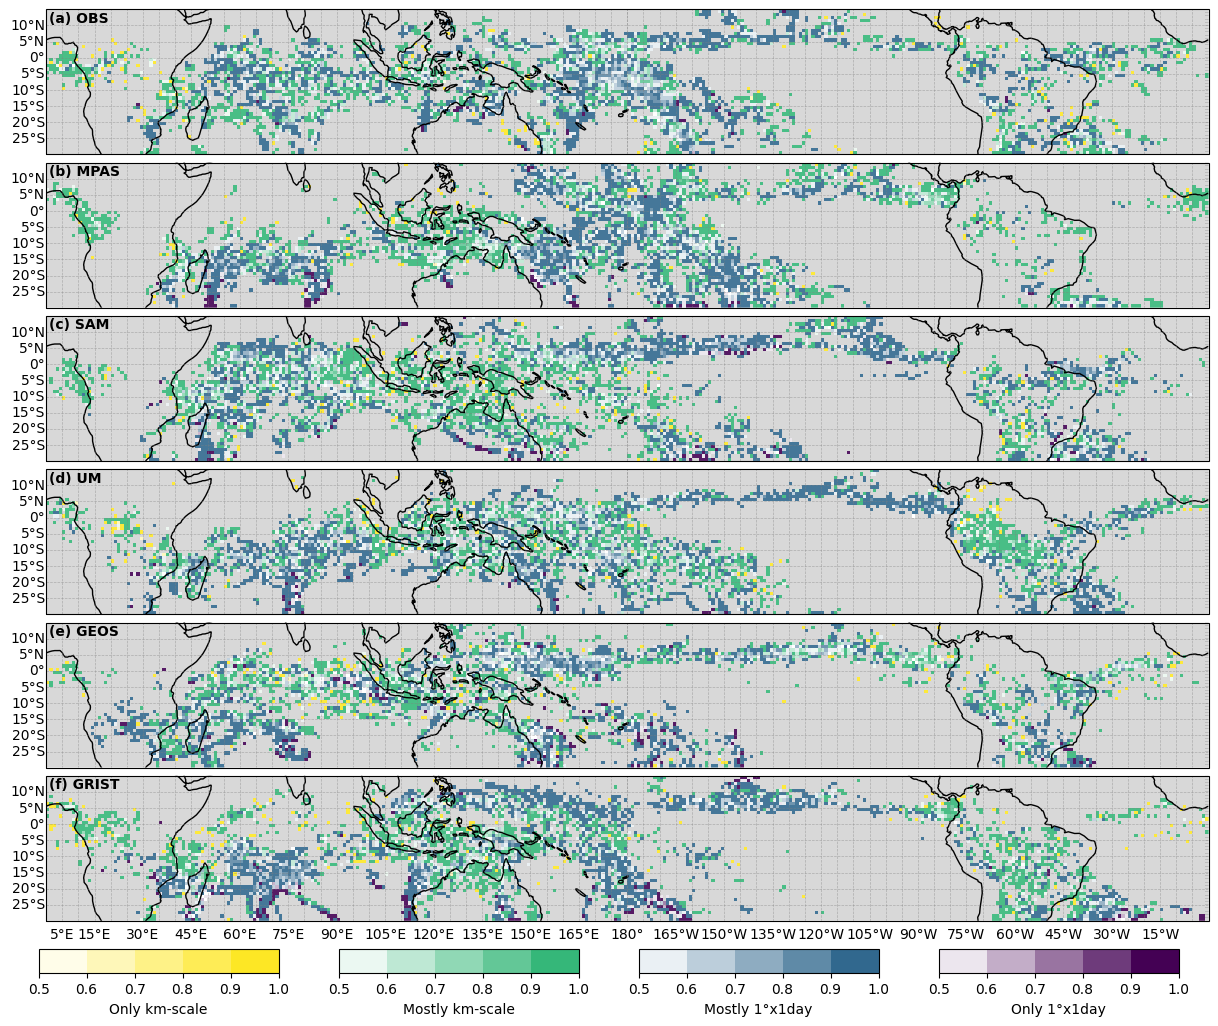

In [40]:
overwrite = False ## datalayers

#### fig 3 maps 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import warnings
import cartopy.crs as ccrs
import matplotlib.ticker as mticker

colormaps = cmaps
# Norms (assuming same boundaries for simplification)
norms = [mpl.colors.BoundaryNorm([0.5, 0.6, 0.7, 0.8, 0.9, 1], colormap.N) for colormap in colormaps]

#### This block makes mask_all 
rank_conv_min = 99
rank_acc_min = 99
mask_alls =[]


for jd in jds: 
    jd.make_mask()
    mask_rank_conv = np.outer(jd.dist1.ranks >= 0, jd.dist2.ranks >= rank_conv_min)
    mask_rank_acc = np.outer(jd.dist1.ranks >= rank_acc_min , jd.dist2.ranks >= 0)
    mask_alls.append([
        np.logical_and(jd.mask_branch1_90, mask_rank_conv), 
        np.logical_and(jd.mask_coloc_c_90, mask_rank_conv), 
        np.logical_and(jd.mask_coloc_ac_90, mask_rank_acc), 
        np.logical_and(jd.mask_branch2_90, mask_rank_acc)
    ])

# Calculate figure size based on jd grid
dlon = np.diff((jds[0].grid.casestudy.lon_slice.start, jds[0].grid.casestudy.lon_slice.stop))[0] % 360
if dlon == 0: dlon = 360
dlat = np.diff((jds[0].grid.casestudy.lat_slice.start, jds[0].grid.casestudy.lat_slice.stop))[0]
Lx_fig = 15
Lx_cbar = 1.5
Ly_title = 1
Ly_fig = (Lx_fig - Lx_cbar) / dlon * dlat + Ly_title
print('figure size =', Lx_fig, Ly_fig)

# Initialize figure with subplots
fig, axes = plt.subplots(len(jds), 1, figsize=(Lx_fig, Ly_fig * len(jds)/1.35), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})
letters = ["("+chr(97 + i)+")" for i in range(len(jds))]  

if len(jds) == 1:
    axes = [axes]

for jd, mask_all, ax, letter in zip(jds, mask_alls, axes, letters):
    jd_output = os.path.join(jd.settings["DIR_DATA_OUT"], jd.name)
    data_file = os.path.join(jd_output, 'map_data_layers.pkl')
    map_no_extremes_file = os.path.join(jd_output, 'map_no_extremes.pkl')

    if not overwrite and os.path.exists(data_file):
        print(f"Loading data_layers from {data_file}.")
        data_layers = load_data(data_file)
        mask_no_extremes = load_data(map_no_extremes_file)

    else:
        print(f"Computing data_layers and saving to {data_file}.")
        list_mask_yxt = []
        for mask_ranked, cmap in zip(mask_all, colormaps):
            mask_yxt = jd.get_mask_yxt_from_mask_jdist(mask_ranked)
            list_mask_yxt.append(mask_yxt)
        mask_yxt_stacked = np.stack(list_mask_yxt)
        mask_no_extremes = np.sum(mask_yxt_stacked, axis = (0,-1))!=0
        mask_yxt_stacked = np.sum(mask_yxt_stacked, axis=-1) / np.sum(mask_yxt_stacked, axis=(0, -1)) ## axis 0 is class, last axis is days
        data_layers = [data for data in mask_yxt_stacked]
        for data in data_layers:
            data[data < 0.5] = np.nan

        save_data(data_file, data_layers)
        save_data(map_no_extremes_file, mask_no_extremes)


    lat_1d = jd.get_coord_values('lat')
    lon_1d = jd.get_coord_values('lon')
    lon_meshgrid, lat_meshgrid = np.meshgrid(lon_1d, lat_1d)

    # width = 0.06
    # height = 0.81
    # bottom = 0.092
    # left = 3.75
    # left_incr = 0.061
    # base_cax_positions = [[i, bottom, width, height] for i in [left, left+1*left_incr, left+2*left_incr, left+3*left_incr]]

    # # Get the current axis position to adjust the cax positions accordingly
    # pos = ax.get_position()
    # print(pos)
    # cax_positions = []

    # for base_pos in base_cax_positions:
    #     cax_positions.append([
    #         pos.x0 + base_pos[0] * pos.width,
    #         1*(pos.y0)+ base_pos[1]* pos.height,
    #         base_pos[2] * pos.width,
    #         base_pos[3] * pos.height
    #     ])

    im = ax.pcolormesh(lon_meshgrid, lat_meshgrid, mask_no_extremes, transform=ccrs.PlateCarree(), alpha=0.3, cmap=cmap_grey, norm=norm_grey)
  
    for i, (data, colormap, norm) in enumerate(zip(data_layers, colormaps, norms)):
        with warnings.catch_warnings():
            warnings.simplefilter('ignore')
            im = ax.pcolormesh(lon_meshgrid, lat_meshgrid, data, transform=ccrs.PlateCarree(), alpha=0.9, cmap=colormap, norm=norm)
        # cax = fig.add_axes(cax_positions[i])
        # cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=colormap), cax=cax, ticks=[0.5, 0.6, 0.7, 0.8, 0.9, 1], spacing='uniform')
        # if i != 3: 
        #     cb.set_ticks([]) 
    lat_letter = 11 if "Winter" in jd.name else 32
    ax.text(-179, lat_letter, letter+" "+jd.name.split("_")[0], color = 'k', fontweight='bold')
    # ax.set_title(jd.name.split("_")[0])
    ax.coastlines('110m')
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    gl.xlocator = mticker.FixedLocator(range(-180, 181, 5))
    gl.ylocator = mticker.FixedLocator(range(-90, 91, 5))
    gl.top_labels = False  # Turn off labels on top x-axis
    gl.right_labels = False  # Turn off labels on right y-axis
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    if letter in ['(f)']:
        gl.bottom_labels = True
    else:
        gl.bottom_labels = False

# Each colorbar: horizontally at the bottom
# adjust bottom_y, height, left_x, and width as needed
bottom_y = 0.07     # vertical position for colorbars
height   = 0.02     # colorbar thickness
left_x   = 0.12     # where the first colorbar starts
width    = 0.16     # each colorbar width
x_step   = 0.2    # horizontal step to place next colorbar

names = ["Only km-scale", "Mostly km-scale", "Mostly 1°x1day", "Only 1°x1day"]
for i, (cmap, norm, name) in enumerate(zip(colormaps, norms, names)):
    cax = fig.add_axes([left_x + i*x_step, bottom_y, width, height])
    cbar = fig.colorbar(
        mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
        cax=cax,
        orientation='horizontal',
        ticks=[0.5, 0.6, 0.7, 0.8, 0.9, 1]  # same tick settings as before
    )
    # Add a title/label for each colorbar:
    cbar.set_label(name, fontsize=10)
# plt.tight_layout()
# plt.show()
plt.subplots_adjust(hspace=0.0)

# Fig Supplementary 

In [ ]:
# settings_path = 'settings/sam_4km_30min_30d.yaml'

### WINTER + SUMMER###
settings_paths = [
"settings/obs_summer_30d.yaml",
"settings/arpege_summer_30d.yaml", 
"settings/ifs_summer_30d.yaml",
"settings/mpas_summer_30d.yaml", 
"settings/screamv1_summer_30d.yaml", 
"settings/sam_summer_30d.yaml", 
"settings/um_summer_30d.yaml",
"settings/fv3_summer_30d.yaml", 
"settings/nicam_summer_30d.yaml", 
               ]

hdlrs = [handler.Handler(settings_path) for settings_path in settings_paths]
css = [casestudy.CaseStudy(hdlr, overwrite = False ,verbose = False) for hdlr in hdlrs]
grs = [grid.Grid(cs, fast = True, overwrite= False, verbose_steps = False, verbose = False) for cs in css]
jds = [joint_distrib.JointDistribution(gr, None, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_75_Prec", 
        nbpd = 20,  nd=5, overwrite = True, dist_mask = False) for gr in grs]

lm = grs[0].get_landmask()
ocean = lm.Landmask == 0
ocean = ocean.values[:,:,np.newaxis]

Data loaded from /scratchx/mcarenso/tempest/OBS_Summer_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/ARPEGE_Summer_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/IFS_Summer_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/MPAS_Summer_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/SCREAMv1_Summer_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/SAM_Summer_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/UM_Summer_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/FV3_Summer_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/NICAM_Summer_lowRes_Tropics/var_id_days_i_t.json
Found grid attributes file , so loading /scratchx/mcarenso/tempest/OBS_Summer_lowRes_Tropics/grid_attributes.pkl instead of computing
Found grid attributes file , so loadi

Found grid attributes file , so loading /scratchx/mcarenso/tempest/UM_Summer_lowRes_Tropics/grid_attributes.pkl instead of computing
Found grid attributes file , so loading /scratchx/mcarenso/tempest/FV3_Summer_lowRes_Tropics/grid_attributes.pkl instead of computing
Found grid attributes file , so loading /scratchx/mcarenso/tempest/NICAM_Summer_lowRes_Tropics/grid_attributes.pkl instead of computing


/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:1123: RuntimeWarning: invalid value encountered in divide
  hist = hist / dedges[i].reshape(shape)


Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recom

figure size = 15 2.6875
Loading data_layers from /scratchx/mcarenso/tempest/OBS_Summer_lowRes_Tropics/map_data_layers.pkl.
Loading data_layers from /scratchx/mcarenso/tempest/ARPEGE_Summer_lowRes_Tropics/map_data_layers.pkl.
Loading data_layers from /scratchx/mcarenso/tempest/IFS_Summer_lowRes_Tropics/map_data_layers.pkl.
Loading data_layers from /scratchx/mcarenso/tempest/MPAS_Summer_lowRes_Tropics/map_data_layers.pkl.
Loading data_layers from /scratchx/mcarenso/tempest/SCREAMv1_Summer_lowRes_Tropics/map_data_layers.pkl.
Loading data_layers from /scratchx/mcarenso/tempest/SAM_Summer_lowRes_Tropics/map_data_layers.pkl.
Loading data_layers from /scratchx/mcarenso/tempest/UM_Summer_lowRes_Tropics/map_data_layers.pkl.
Loading data_layers from /scratchx/mcarenso/tempest/FV3_Summer_lowRes_Tropics/map_data_layers.pkl.
Loading data_layers from /scratchx/mcarenso/tempest/NICAM_Summer_lowRes_Tropics/map_data_layers.pkl.


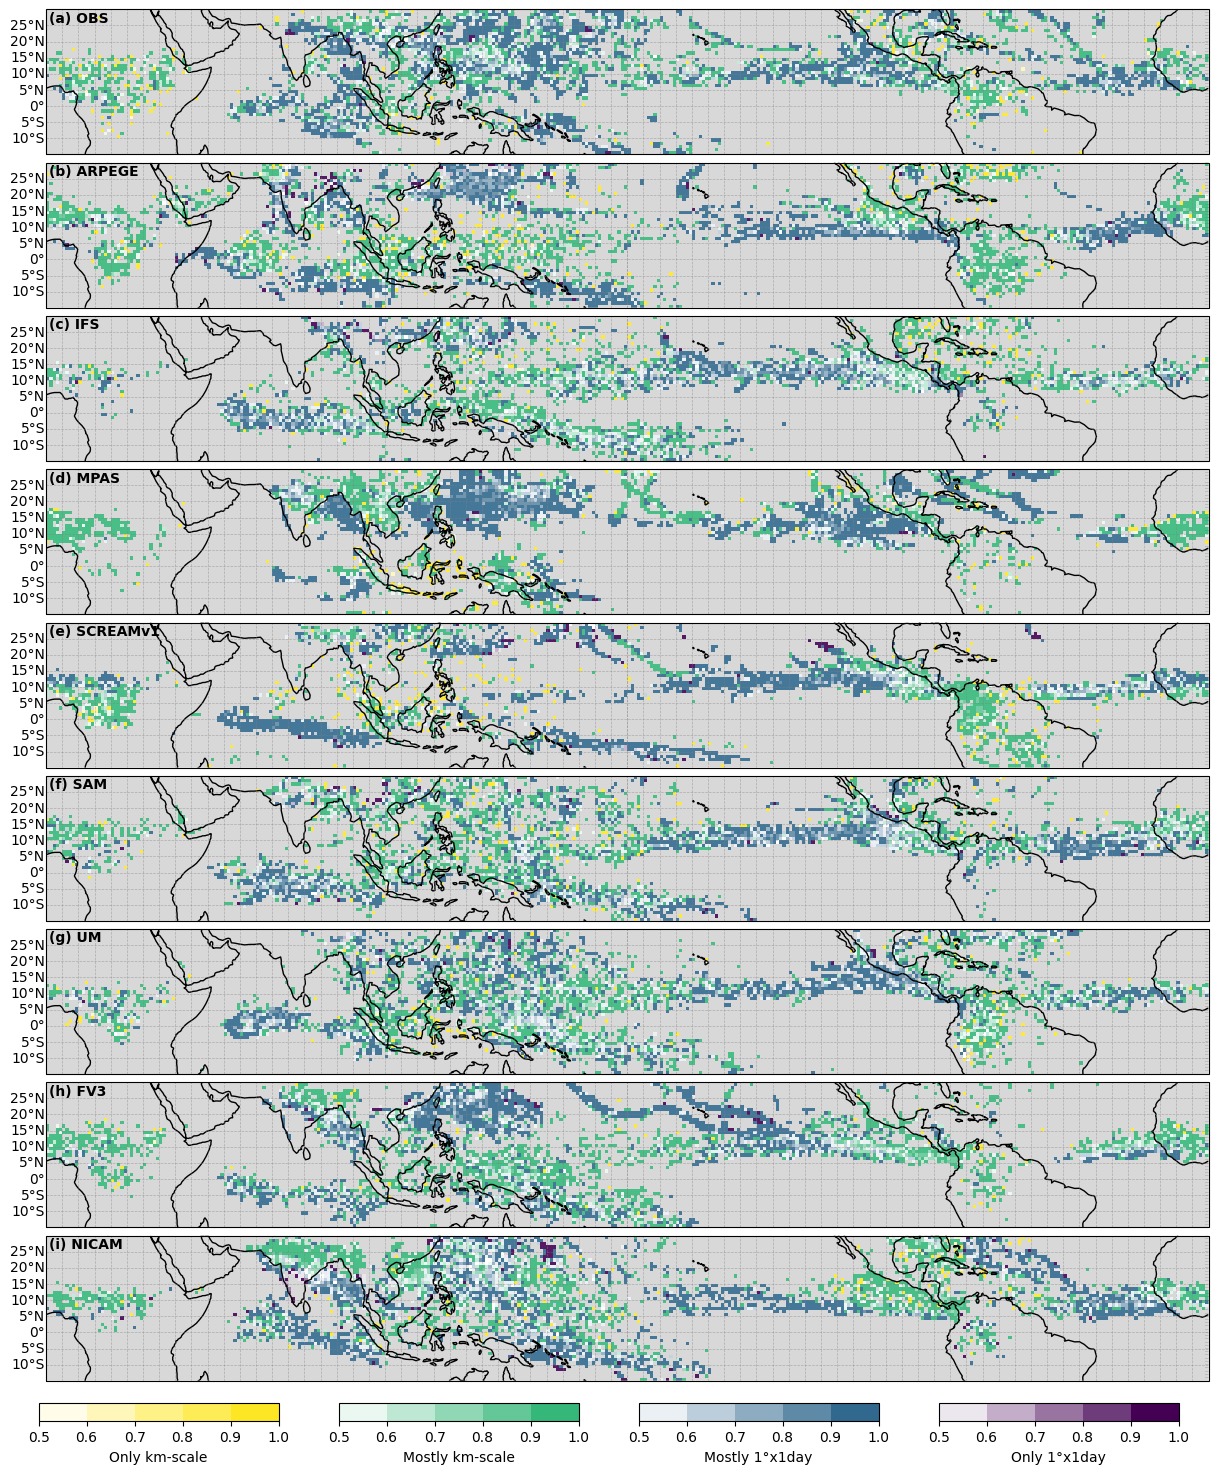

In [ ]:
overwrite = False ## datalayers

#### fig 3 maps 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import warnings
import cartopy.crs as ccrs
import matplotlib.ticker as mticker

colormaps = cmaps
# Norms (assuming same boundaries for simplification)
norms = [mpl.colors.BoundaryNorm([0.5, 0.6, 0.7, 0.8, 0.9, 1], colormap.N) for colormap in colormaps]

#### This block makes mask_all 
rank_conv_min = 99
rank_acc_min = 99
mask_alls =[]


for jd in jds: 
    jd.make_mask()
    mask_rank_conv = np.outer(jd.dist1.ranks >= 0, jd.dist2.ranks >= rank_conv_min)
    mask_rank_acc = np.outer(jd.dist1.ranks >= rank_acc_min , jd.dist2.ranks >= 0)
    mask_alls.append([
        np.logical_and(jd.mask_branch1_90, mask_rank_conv), 
        np.logical_and(jd.mask_coloc_c_90, mask_rank_conv), 
        np.logical_and(jd.mask_coloc_ac_90, mask_rank_acc), 
        np.logical_and(jd.mask_branch2_90, mask_rank_acc)
    ])

# Calculate figure size based on jd grid
dlon = np.diff((jds[0].grid.casestudy.lon_slice.start, jds[0].grid.casestudy.lon_slice.stop))[0] % 360
if dlon == 0: dlon = 360
dlat = np.diff((jds[0].grid.casestudy.lat_slice.start, jds[0].grid.casestudy.lat_slice.stop))[0]
Lx_fig = 15
Lx_cbar = 1.5
Ly_title = 1
Ly_fig = (Lx_fig - Lx_cbar) / dlon * dlat + Ly_title
print('figure size =', Lx_fig, Ly_fig)

# Initialize figure with subplots
fig, axes = plt.subplots(len(jds), 1, figsize=(Lx_fig, Ly_fig * len(jds)/1.35), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})
letters = ["("+chr(97 + i)+")" for i in range(len(jds))]  

if len(jds) == 1:
    axes = [axes]

for jd, mask_all, ax, letter in zip(jds, mask_alls, axes, letters):
    jd_output = os.path.join(jd.settings["DIR_DATA_OUT"], jd.name)
    data_file = os.path.join(jd_output, 'map_data_layers.pkl')
    map_no_extremes_file = os.path.join(jd_output, 'map_no_extremes.pkl')

    if not overwrite and os.path.exists(data_file):
        print(f"Loading data_layers from {data_file}.")
        data_layers = load_data(data_file)
        mask_no_extremes = load_data(map_no_extremes_file)

    else:
        print(f"Computing data_layers and saving to {data_file}.")
        list_mask_yxt = []
        for mask_ranked, cmap in zip(mask_all, colormaps):
            mask_yxt = jd.get_mask_yxt_from_mask_jdist(mask_ranked)
            list_mask_yxt.append(mask_yxt)
        mask_yxt_stacked = np.stack(list_mask_yxt)
        mask_no_extremes = np.sum(mask_yxt_stacked, axis = (0,-1))!=0
        mask_yxt_stacked = np.sum(mask_yxt_stacked, axis=-1) / np.sum(mask_yxt_stacked, axis=(0, -1)) ## axis 0 is class, last axis is days
        data_layers = [data for data in mask_yxt_stacked]
        for data in data_layers:
            data[data < 0.5] = np.nan

        save_data(data_file, data_layers)
        save_data(map_no_extremes_file, mask_no_extremes)


    lat_1d = jd.get_coord_values('lat')
    lon_1d = jd.get_coord_values('lon')
    lon_meshgrid, lat_meshgrid = np.meshgrid(lon_1d, lat_1d)

    im = ax.pcolormesh(lon_meshgrid, lat_meshgrid, mask_no_extremes, transform=ccrs.PlateCarree(), alpha=0.3, cmap=cmap_grey, norm=norm_grey)
  
    for i, (data, colormap, norm) in enumerate(zip(data_layers, colormaps, norms)):
        with warnings.catch_warnings():
            warnings.simplefilter('ignore')
            im = ax.pcolormesh(lon_meshgrid, lat_meshgrid, data, transform=ccrs.PlateCarree(), alpha=0.9, cmap=colormap, norm=norm)
    lat_letter = 11 if "Winter" in jd.name else 26
    ax.text(-179, lat_letter, letter+" "+jd.name.split("_")[0], color = 'k', fontweight='bold')
    # ax.set_title(jd.name.split("_")[0])
    ax.coastlines('110m')
    gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    gl.xlocator = mticker.FixedLocator(range(-180, 181, 5))
    gl.ylocator = mticker.FixedLocator(range(-90, 91, 5))
    gl.top_labels = False  # Turn off labels on top x-axis
    gl.right_labels = False  # Turn off labels on right y-axis
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    if letter in ['(f)']:
        gl.bottom_labels = True
    else:
        gl.bottom_labels = False

# Each colorbar: horizontally at the bottom
# adjust bottom_y, height, left_x, and width as needed
bottom_y = 0.09     # vertical position for colorbars
height   = 0.01     # colorbar thickness
left_x   = 0.12     # where the first colorbar starts
width    = 0.16     # each colorbar width
x_step   = 0.2    # horizontal step to place next colorbar

names = ["Only km-scale", "Mostly km-scale", "Mostly 1°x1day", "Only 1°x1day"]
for i, (cmap, norm, name) in enumerate(zip(colormaps, norms, names)):
    cax = fig.add_axes([left_x + i*x_step, bottom_y, width, height])
    cbar = fig.colorbar(
        mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
        cax=cax,
        orientation='horizontal',
        ticks=[0.5, 0.6, 0.7, 0.8, 0.9, 1]  # same tick settings as before
    )
    # Add a title/label for each colorbar:
    cbar.set_label(name, fontsize=10)
# plt.tight_layout()
# plt.show()
plt.subplots_adjust(hspace=0.0)